In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
from functions_smectic import *
import csv

In [2]:
# Usage
directory = './06262/'
qmap_filename = "qmap_output.npz"
mask_filename = "mask_smectic.npz" #the whole dataset uses the same mask
initial_angle = 64/180*np.pi
previous_results_filename = "test.csv"

In [3]:
#read from 1D profile and find the range of the inner q peak in this data folder
#then choose qmin and qmax such that it covers all

file_path = directory + previous_results_filename
min_val, max_val = get_smaller_peak_range(file_path)
#print(f"Min: {min_val}, Max: {max_val}")

qmin = max(min_val - 0.04, 0.1)
qmax = max_val + 0.04
print(qmin, qmax)
#qmin = 0.12
#qmax = 0.2

dq = 0.005
Nq = int((qmax - qmin)/dq)
Ntheta = 60

0.11688703060074629 0.2009620184085579


{'Center_1': 523.0, 'Center_2': 690.0, 'Dim_1': 1004.0, 'Dim_2': 1066.0, 'SampleDistance': 0.172, 'WaveLength': 1.54189e-10, 'PSize_1': 0.000172, 'PSize_2': 0.000172}


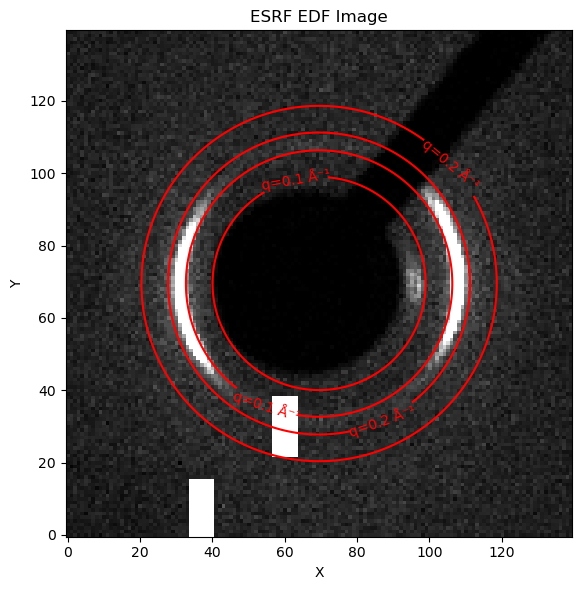

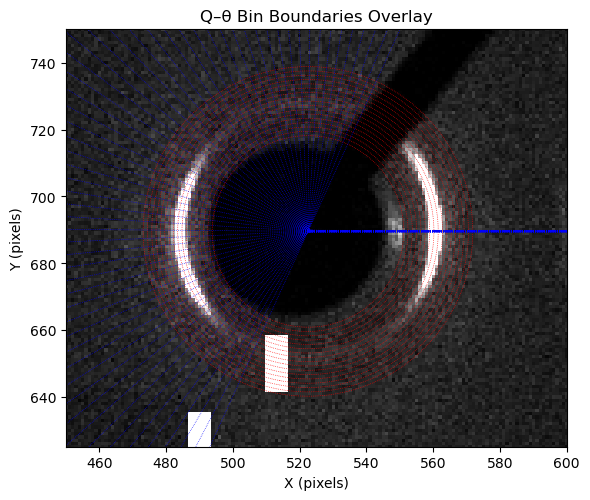

Saved Q–θ mask data to: ./06262/mask_smectic.npz


In [4]:
filename = '06262_0_vd_00003-00004.edf'
image = read_esrf_edf_image(directory + filename)

# Optional: scale contrast using percentiles
vmin, vmax = 0, 100
# Usage
params = extract_edf_parameters(directory + filename)
print(params)

Q, angle, Qx, Qy = load_Qmaps(directory + qmap_filename)
check_Qmap_center(image, params, Q, q_levels=[0.12, 0.15, 0.17, 0.2], vmin=vmin, vmax=vmax)

#if this is not centered, go to create_qmap.ipynb

create_smectic_mask(directory, mask_filename, image, Q, angle, qmin, 
                                                  qmax, Nq, Ntheta, 
                                                  initial_angle, vmin, vmax)

In [5]:
edf_files = load_all_edf_files(directory)

output_filename = directory + "InnerRing_results.csv"

mask, list_q, list_theta, mesh_q, mesh_theta, bin_lookup, qmin, qmax = load_qtheta_mask(directory + mask_filename)

# Open CSV file for writing
with open(output_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write header
    header = ['filename', 'I0_para_fit', 'q0_para_fit [A^{-1}]', 'xi_para_fit [A]', 'FWHM [A^{-1}]', 'domain size [A]', 'I0_perp_fit2', 'xi_perp_fit2 [A^{-1}]', 'theta_range [radians]']
    writer.writerow(header)
    
    # Loop through files and save data
    for filename in edf_files:
        try:
        
            I0_fit, q0_fit, xi_fit, fwhm, domain_size, I0_fit2, xi_fit2, theta_range = smectic_procedure(directory, filename, mask, mesh_q, mesh_theta, list_q, list_theta, Q, angle, qmin, qmax, initial_angle)

            row = [filename, I0_fit, q0_fit, xi_fit, fwhm, domain_size, I0_fit2, xi_fit2, np.abs(theta_range)]
            
            #print(row)
            writer.writerow(row)
            print(f"Processed: {filename}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")

0.007924151576656895
['06262_0_vd_00003-00004.edf', 2055.7257151112854, 0.15521053681558883, 469.85152993951954, 0.004256663802408912, 1476.0821147359193, 979.6456081175319, -6.427128212160015, 0.3111809713420739]
Processed: 06262_0_vd_00003-00004.edf
-0.000933572087209423
['06262_0_vd_00017-00018.edf', 987.3259679697125, 0.15539656316925698, 230.8057367860411, 0.008665295879772768, 725.0976070934062, 700.5114161104248, 3.8179868593994737, 0.5238362712213676]
Processed: 06262_0_vd_00017-00018.edf
-1.58500040233187
['06262_0_vd_00035-00036.edf', 2618.6775979298063, 0.15942990881073127, 142.57899021170033, 0.014027312137857151, 447.9251082053288, 2473.1002711538217, -7.240711576801835, 0.2762159462900999]
Processed: 06262_0_vd_00035-00036.edf
